<a id = "head"></a>
# <p style="text-align: center;">Сегментация пользователей банка по потреблению</p>
---

## Материалы

1. [Презентация](https://yadi.sk/i/T7Ul9iNOqEPMxg)
2. [Дашборд](https://public.tableau.com/profile/vladislav3521#!/vizhome/Bank_dashboard_16022675677310/_?publish=yes)

### Описание проекта
---

В нашем распоряжении датасет с данными о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростове Великом и Рыбинске. 

**Задача:** Необходимо проанализировать клиентов регионального банка, сегментировать пользователей по количеству потребляемых продуктов и выявить какие признаки сильнее всего влияют на отток.

### Описание данных 
---

В датасете содержатся следующие колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### План выполнения проекта
---

1. [Изучение общей информации о данных, предобработка](#step1)
2. [Исследовательский анализ данных (EDA)](#step2)
3. [Сегментация пользователей на основе данных о количестве потребляемых продуктов](#step3)
   
    - Рассчитать внутри каждого сегмента процент ушедших
    - Определить внутри каждого сегмента дополнительные показатели (средние доход, баланс на счете, количество используемых продуктов, баллы кредитного скоринга и другие, количество объектов в собственности)

4. [Проверка гипотез:](#step4)
    
    - Доход между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается;
    - Баланс на счёте между клиентами, владеющими кредитной картой, и теми, у кого её нет, различается; 
    - Активные и неактивные клиенты пользуются разным количеcтвом продуктов;
    - Активные и неактивные клиенты владеют разным количеством собственности;
    - Мужчины и женщины в среднем используют разное количество продуктов.

5. [Общий вывод по проекту](#step5)
   
    - Сделать выводы: что в большей мере влияет на количество используемых продуктов. Как применить эту информацию на практике.
    - Сделать выводы: какие параметры больше влияют на вероятность ухода.
    - Разработать рекомендации по улучшению взаимодействия с клиентами банка.

<a id = "step1"></a>
## 1. Изучение общей информации о данных, предобработка

- [Начало](#head)
- [Пункт 2](#step2) 
- [Пункт 3](#step3)
- [Пункт 4](#step4)
- [Пункт 5](#step5)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from termcolor import colored

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
bank_df = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\bank_dataset.csv')

In [5]:
bank_df.sample(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
4883,15636016,614,Ростов Великий,М,43,8,140733.74,1,1,1,166588.76,0
5745,15666385,629,Рыбинск,М,32,3,NaN,2,1,1,15404.64,0
2950,15787655,734,Рыбинск,Ж,37,0,152760.24,1,1,1,48990.50,0
3017,15744698,590,Рыбинск,Ж,29,2,166930.76,2,1,0,122487.73,0
3246,15621948,638,Ярославль,М,57,6,NaN,1,1,0,33676.48,1
4690,15724726,497,Ростов Великий,М,24,6,111769.14,2,1,0,55859.27,0
1488,15668560,596,Рыбинск,М,30,6,121345.88,4,1,0,41921.75,1
3261,15811029,614,Ярославль,М,51,3,NaN,2,1,1,5552.37,0
3663,15645467,724,Ярославль,М,31,5,NaN,1,1,0,134889.95,1
1428,15837296,550,Ярославль,М,57,5,NaN,1,1,1,133501.94,0


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
bank_df.duplicated().sum() 

0

---
**В датасете присутсвуют данные о 10000 клиентах банка «Метанпром». Всем колонкам соответсвуют правильные типы данных. В столбце "Баланс на счете" обнаружены пропуски. Дубликаты отсутсвуют.**

In [7]:
# Приведем названия колонок к нижнему регистру:
bank_df.columns = bank_df.columns.str.lower()

**Необходимо заполнить пропуски в информации о балансе клиента. Для этого посмотрим как распределы показатели:**

In [8]:
bank_df['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

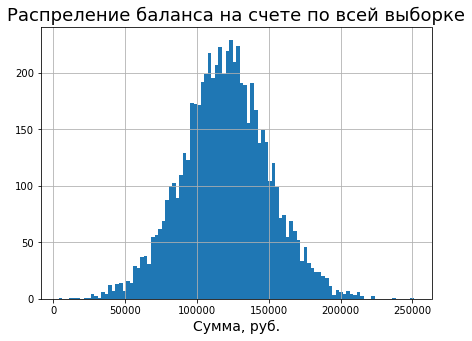

In [9]:
bank_df['balance'].hist(bins = 100, figsize = (7,5))
plt.title("Распреление баланса на счете по всей выборке", fontsize=18)
plt.xlabel("Сумма, руб.", fontsize = 14);

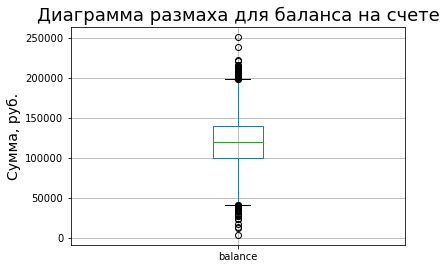

In [10]:
bank_df.boxplot(column = 'balance')
plt.title("Диаграмма размаха для баланса на счете", fontsize=18)
plt.ylabel("Сумма, руб.", fontsize = 14);

In [11]:
bank_df[bank_df['balance'].isna()]['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

In [12]:
bank_df[bank_df['city'] == 'Ярославль']['balance'].describe()

count      2596.000000
mean     119927.765597
std       31732.792620
min        3768.690000
25%       98440.985000
50%      120135.155000
75%      141143.112500
max      238387.560000
Name: balance, dtype: float64

In [13]:
bank_df[bank_df['city'] == 'Рыбинск']['balance'].describe()

count      1278.000000
mean     119814.985923
std       32342.692736
min       12459.190000
25%       98066.692500
50%      119726.450000
75%      140342.130000
max      250898.090000
Name: balance, dtype: float64

In [14]:
bank_df[bank_df['city'] == 'Ростов Великий']['balance'].describe()

count      2509.000000
mean     119730.116134
std       27022.006157
min       27288.430000
25%      102800.720000
50%      119703.100000
75%      137560.380000
max      214346.960000
Name: balance, dtype: float64

Распределение баланса на счете для всей выборки похоже на нормальное, выбросы отсутсвуют. Средняя сумма на счете для всех клиентов и клиентов разных городов по отдельности отличается не сильно. Считаем, что будет корректно заполнить пропуски средней суммой на балансе для всех клиентов. 

In [15]:
bank_df['balance'] = bank_df['balance'].fillna(round(bank_df['balance'].mean(),2))

<a id = "step2"></a>
## 2. Исследовательский анализ данных (EDA)

- [Начало](#head)
- [Пункт 1](#step1) 
- [Пункт 3](#step3)
- [Пункт 4](#step4)
- [Пункт 5](#step5)


In [16]:
columns = {'score':"Баллы кредитного скоринга", 'age':'Возраст', 'balance':'Баланс на счёте',
           'estimated_salary':'Заработная плата клиента'}

--------------- Описательная статистика для столбца  Баллы кредитного скоринга ---------------

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64



<Figure size 432x288 with 0 Axes>

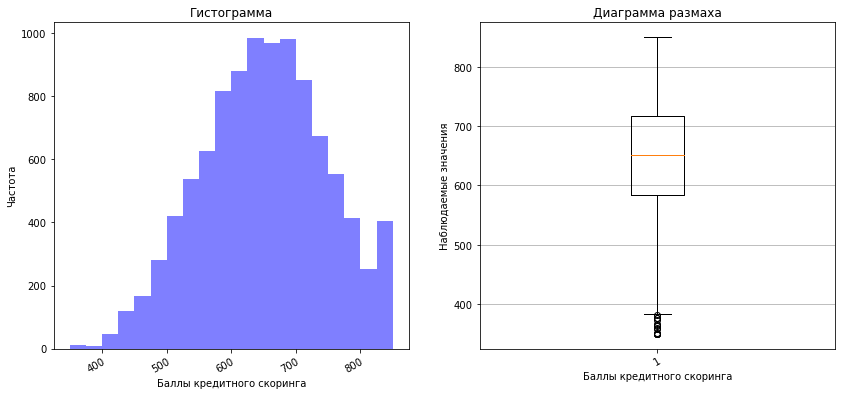

--------------- Описательная статистика для столбца  Возраст ---------------

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64



<Figure size 432x288 with 0 Axes>

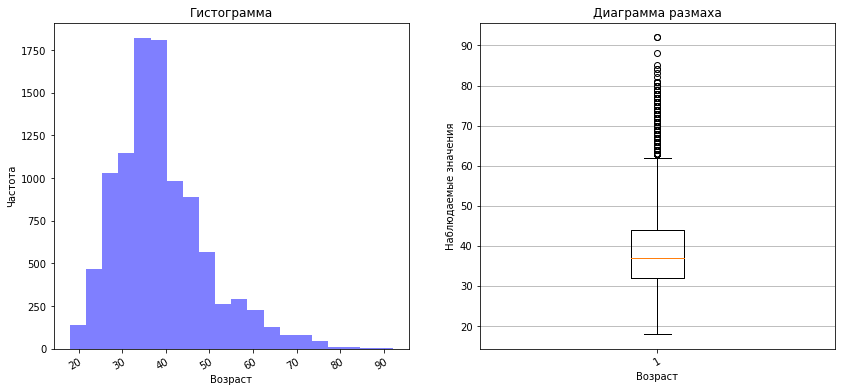

--------------- Описательная статистика для столбца  Баланс на счёте ---------------

count     10000.000000
mean     119827.492421
std       24043.366590
min        3768.690000
25%      111581.127500
50%      119827.490000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64



<Figure size 432x288 with 0 Axes>

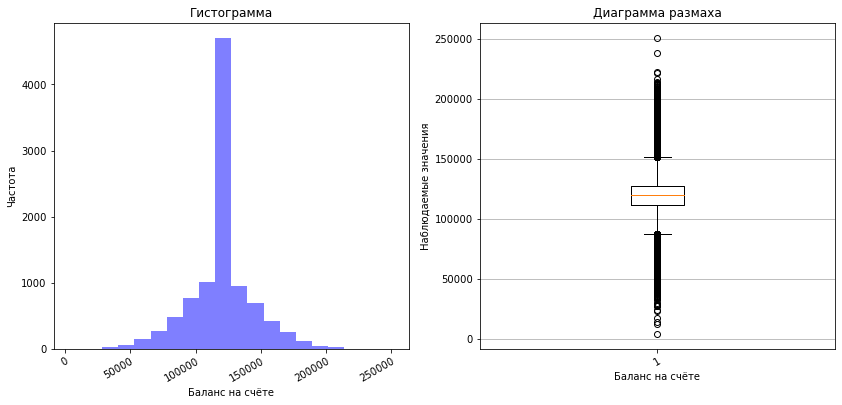

--------------- Описательная статистика для столбца  Заработная плата клиента ---------------

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64



<Figure size 432x288 with 0 Axes>

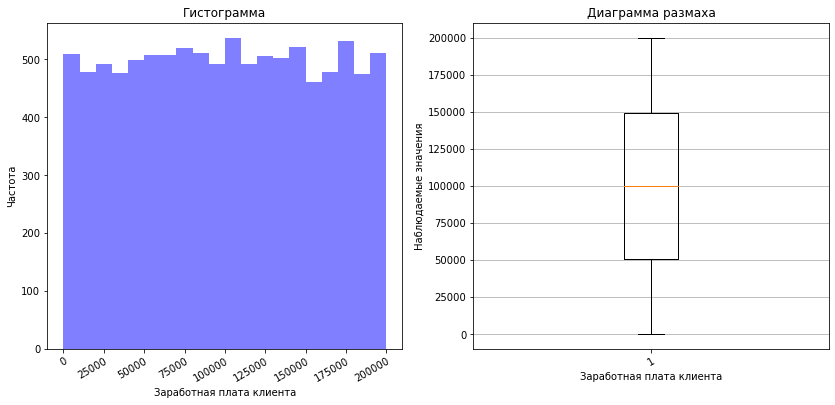

In [17]:
# Цикл будет выводить статистические характеристики, строить гистограмму и диаграмму размаха

for i in columns.keys():
    print('-'*15, 'Описательная статистика для столбца ', colored(columns[i], "blue", attrs=["bold"]), '-'*15)
    print()
    print(bank_df[i].describe())
    print()
    
    fig = plt.figure();
    fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(14, 6));
    
    axes[0].hist(bank_df[i], alpha=0.5, bins=20, color = 'blue');
    axes[0].set(title = 'Гистограмма')
    axes[0].set_ylabel('Частота')
    
    axes[1].boxplot(bank_df[i]);
    axes[1].set(title = 'Диаграмма размаха')
    axes[1].yaxis.grid(True)
    axes[1].set_ylabel('Наблюдаемые значения')
    
    
    for ax in axes:
        ax.set_xlabel(columns[i])
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    
    plt.show();

В среднем у клиентов банка 650 баллов кредитного скоринга. Значения данного показателя распределены нормально, сильных выбросов нет. 

Основная часть клиентов - это люди в возрасте 32 - 44 года. На диаграмме размаха можно увидеть выбросы. Считаем, что их можно оставить без внимания, так как возрасных клиентов не так много, чтобы они сильно повлияли на результаты исследования. 

Показатель "Баланс на счете" мы уже рассматривали. Пик в районе 119000 руб. обусловлен тем, что нам пришлось заполнить пропуски средним значением по всей выборке. 

Получился довольно любопытный график распределения зарплат клиентов. В данных собрано приблизитено одинаковое число клиентов с разными уровнями зарплаты(продемонстрировал ниже). Стоит обратить на это внимание тех, кто составлял/выгружал данные. Необходимо узнать откуда берутся эти данные. Возможно произошла какая-то ошибка при выгрузке. Особенно смущают клиенты с зарплатой ниже прожиточного минимума (на сегодняшний день прожиточный минимум в Ярославской области составляет приблизительно 12000 рублей).   

In [18]:
df_new = bank_df.copy()

In [19]:
df_new['salary_cat'] = pd.cut(df_new['estimated_salary'], bins = range(0,200000,20000))

In [20]:
df_new['salary_cat'].value_counts()

(100000, 120000]    1027
(60000, 80000]      1027
(160000, 180000]    1009
(120000, 140000]    1007
(40000, 60000]      1006
(80000, 100000]     1002
(0, 20000]           986
(140000, 160000]     982
(20000, 40000]       969
Name: salary_cat, dtype: int64

In [21]:
cat_columns = {'city':"Город", 'gender':"Пол", 'objects':"Количество объектов в собственности", 
               'products':"Количество используемых банковских продуктов", 'creditcard': "Наличие кредитной карты",
               'loyalty':"Активность клиента", 'churn':"Ушёл клиент или нет"}

<a id = "info1"></a>

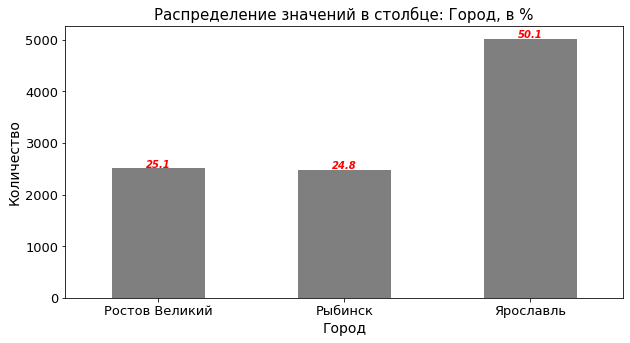

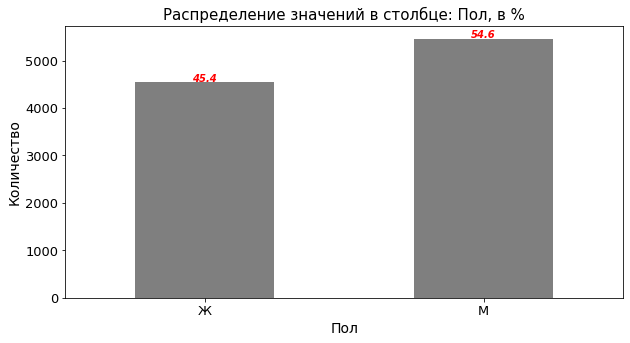

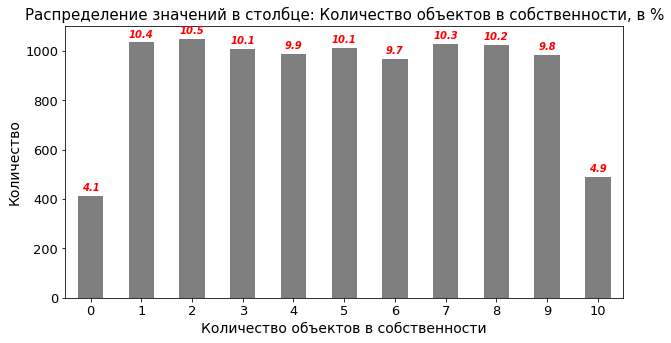

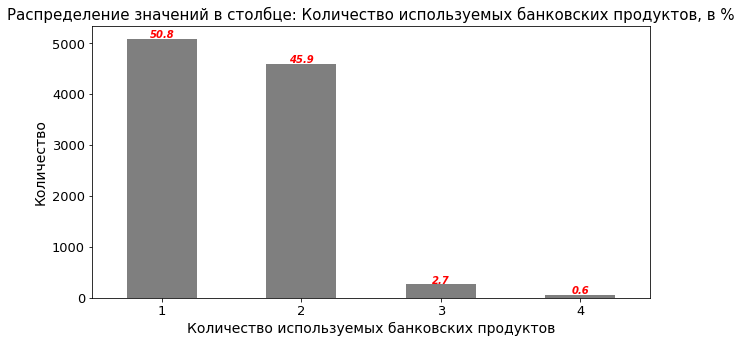

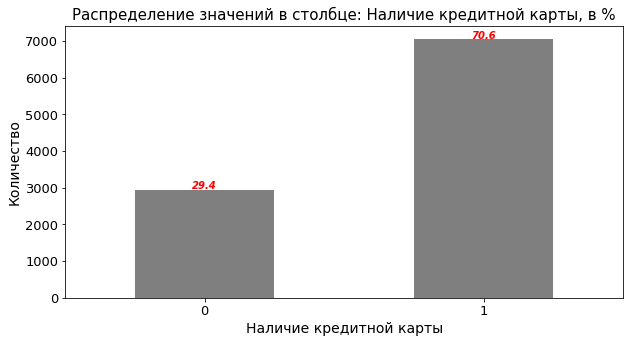

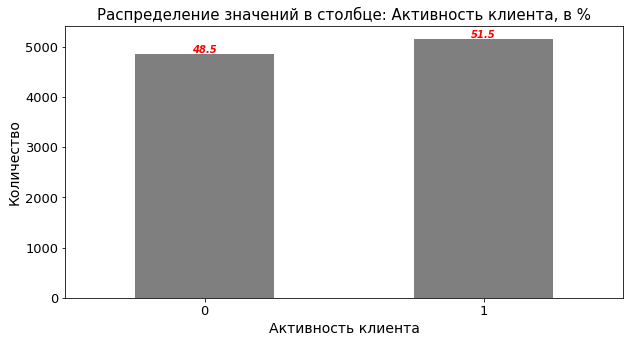

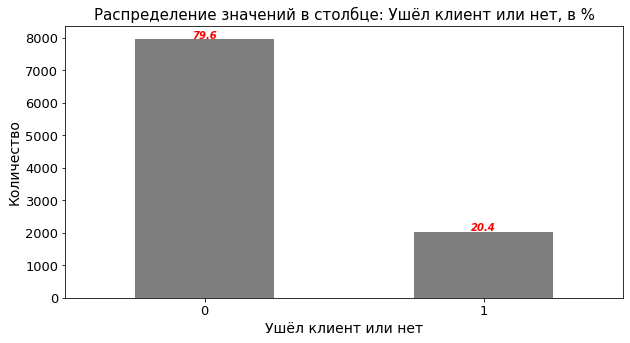

In [22]:
for i in cat_columns:
    #print('Столбец', i)
    grouped = bank_df.groupby(i)['userid'].count()
    grouped.plot(kind='bar', alpha = 0.5, figsize = (10,5), color = 'black', linewidth=10)
    plt.title('Распределение значений в столбце: ' + cat_columns[i]+ ', в %', fontsize = 15)
    plt.xticks(fontsize=13, rotation = 360)
    plt.yticks(fontsize=13)
    plt.ylabel('Количество', fontsize = 14)
    plt.xlabel(cat_columns[i] ,fontsize = 14)
    for j, count in enumerate(grouped):
        plt.text(j, count+20, round(count/grouped.sum()*100,1), horizontalalignment='center', 
                 fontsize = 10, color = 'red', fontweight = 'bold', fontstyle='italic')

    plt.show()
    print()

---
Как видим на графике, половина клиентов из нашего датасета обслуживается в Ярославле. `70.6 %` клиентов владеют кредитными картами. По активности пользователи банковских продуктов разделились практически поровну. `96.7%` клиентов пользуются 1 или 2 банковскими продуктами. Что касается оттока, то `20.4%` клиентов перестали пользоваться услугами банка. 

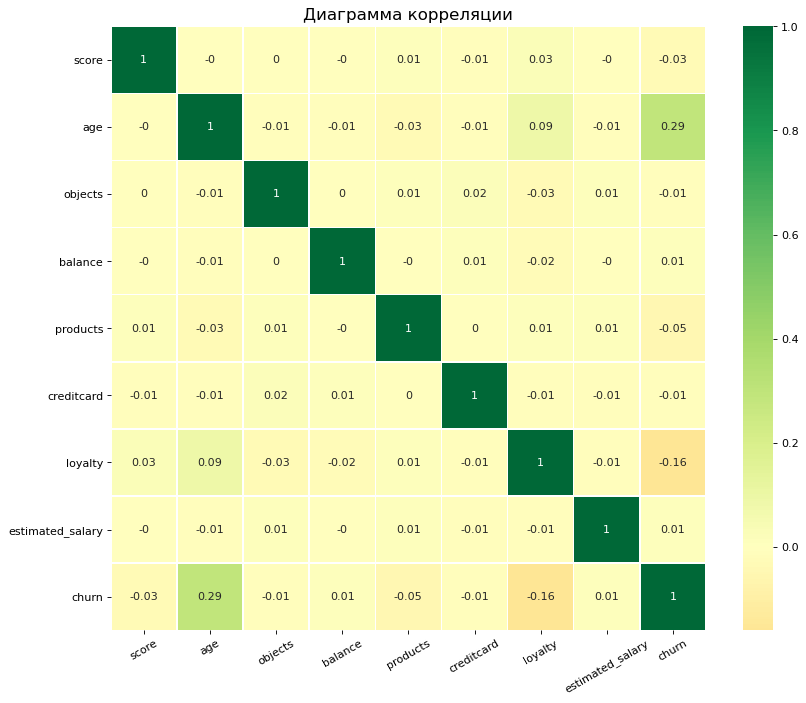

In [23]:
# Построим диаграмму корреляции:
heat = bank_df.drop('userid', axis=1).corr()
plt.figure(figsize=(12,10), dpi= 80)
plt.title('Диаграмма корреляции', fontsize = 15)
sns.heatmap(round(bank_df.drop('userid', axis=1).corr(),2), xticklabels=heat.corr().columns, 
            yticklabels=heat.corr().columns, linewidths=.5,
            cmap='RdYlGn', center=0, annot=True)
plt.xticks(rotation = 30);
#bank_df.drop('userid', axis=1).corr()['churn'].sort_values().to_frame()

---
Наибольшее влияние на показатель оттока оказывает возраст и активность клиента. При этом связь все равно очень слабая. 
Между другими показателями какие-либо связи практически полностью отсутсвуют.

*Создадим дополнительный столбец, в котором будут храниться пол клиентов в цифровом виде*

Под цифрой `1` будут мужчины, `0` - женщины

In [24]:
# Функция для категоризации:
def category_gender(gender):
    if gender == "М":
        return 1
    else:
        return 0

In [25]:
bank_df['sex'] = bank_df['gender'].apply(category_gender)

In [26]:
bank_df.drop('userid', axis=1).groupby('churn').mean()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,sex
churn,,,,,,,,,
0,651.853196,37.408389,5.033279,119650.016901,1.544267,0.707146,0.554565,99738.391772,0.572523
1,645.351497,44.837997,4.932744,120521.276205,1.475209,0.699067,0.360825,101465.677531,0.440844


На основе этой таблицы мы можем сказать,что клиенты, которые попали в отток, в среднем были старше и менее активно пользовались услугами банка.

In [27]:
bank_df.drop('userid', axis=1).groupby('city').mean()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,sex
city,,,,,,,,,,
Ростов Великий,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432,0.524512
Рыбинск,651.333872,38.890997,5.032297,119821.038563,1.539362,0.694792,0.529673,99440.572281,0.166734,0.560355
Ярославль,649.668329,38.511767,5.004587,119879.407720,1.530913,0.706621,0.516753,99899.180814,0.161548,0.549063


In [28]:
bank_df.groupby('city')['churn'].agg({'count','sum','mean'})

,mean,sum,count
city,,,
Ростов Великий,0.324432,814,2509
Рыбинск,0.166734,413,2477
Ярославль,0.161548,810,5014


Самый большой отток произошел в Ростове Великом, банк потерял там **32.4%** своих клиентов.

<a id = "step3"></a>
## 3. Сегментация пользователей на основе данных о количестве потребляемых продуктов

- [Начало](#head)
- [Пункт 1](#step1) 
- [Пункт 2](#step2)
- [Пункт 4](#step4)
- [Пункт 5](#step5)

Логичнее всего сегментировать пользователей по количеству потребляемых продуктов на две категории: кто пользуется одним банковским продуктом  и кто использует два и более банковских продуктов. Это подстверждает график, который мы строили [ранее](#info1). 

Cоздадим в нашей таблице дополнительный столбец: 

In [29]:
# Функция для категоризации:
def category_clients(prod):
    if prod == 1:
        return '1 продукт'
    else:
        return '2 и более продукта'

In [30]:
# Категоризация:
bank_df['prod_category'] = bank_df['products'].apply(category_clients)

In [31]:
bank_df['prod_category'].value_counts()

1 продукт             5084
2 и более продукта    4916
Name: prod_category, dtype: int64

In [32]:
category_pivot = bank_df.pivot_table(index = 'prod_category', values = 'churn', aggfunc=['count', 'mean'])
category_pivot.columns = ['number_of_clients', 'churn, %']
category_pivot['churn, %'] = round(category_pivot['churn, %']*100, 2)
category_pivot

,number_of_clients,"churn, %"
prod_category,,
1 продукт,5084,27.71
2 и более продукта,4916,12.77


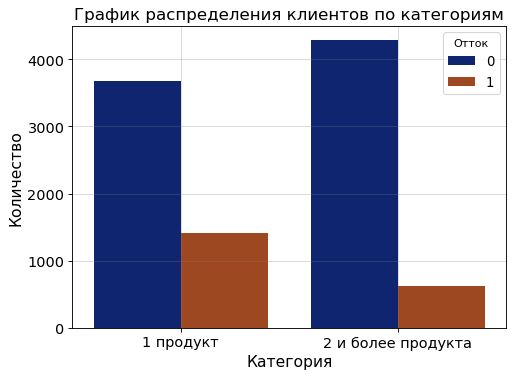

In [33]:
plt.figure(figsize=(7,5), dpi= 80)
sns.countplot(x="prod_category", data=bank_df, hue="churn", palette="dark")
plt.title('График распределения клиентов по категориям', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(b=True, c = 'grey', alpha = 0.3)
plt.ylabel('Количество', fontsize = 14)
plt.xlabel('Категория' ,fontsize = 14)
plt.legend(title='Отток', loc="best", fontsize = 12);

Отток среди клиентов, которые пользуются только одним продуктом выше более чем в два раза, по сравнению с теми клиентами, которые пользуются двумя и более продуктами банка.  

In [34]:
round(bank_df.drop(['userid', 'products'], axis=1).groupby('prod_category').mean(),2)

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn,sex
prod_category,,,,,,,,,
1 продукт,649.12,39.67,4.97,119882.30,0.70,0.50,99487.26,0.28,0.55
2 и более продукта,651.98,38.14,5.05,119770.82,0.71,0.53,100713.83,0.13,0.54


По средним показателям можно сказать, что группы довольно ровные. Значительнео отличие только по одному показателю - оттоку среди клиентов. Еще можно отметить, что средний возраст тех, кто использует один продукт, немного выше по сравнению с другой группой. Если клиент является пользователем одной услуги, то в 70% случаях - это кредитная карта.

<a id = "step4"></a>
## 4. Проверка гипотез

- [Начало](#head)
- [Пункт 1](#step1) 
- [Пункт 2](#step2)
- [Пункт 3](#step3)
- [Пункт 5](#step5)

***Проверим следующие гипотезы:***

---
   1. Доход между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается;
   2. Баланс на счёте между клиентами, владеющими кредитной картой, и теми, у кого её нет, различается; 
   3. Активные и неактивные клиенты пользуются разным количеcтвом продуктов;
   4. Активные и неактивные клиенты владеют разным количеством собственности;
   5. Мужчины и женщины в среднем используют разное количество продуктов.
   
Проверку будем проводить с помощью t-теста с уровнем значимости 5%. Для этого воспользуемся методом `scipy.stats.ttest_ind()`

In [35]:
# Функция для проверки гипотез:
def t_test(A,B):
    alpha = 0.05
    results = st.ttest_ind(A, B, equal_var=False)
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

#### 1) Сравним доходы между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним:

- **Нулевая гипотеза**: Доходы между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним - равны.
- **Альтернативная гипотеза**: Доходы между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним - различаются.

In [36]:
salary_one = bank_df[bank_df['products'] == 1]['estimated_salary']
salary_two = bank_df[bank_df['products'] == 2]['estimated_salary']

In [37]:
t_test(salary_one, salary_two)

p-значение: 0.41047183624949335
Не получилось отвергнуть нулевую гипотезу


In [38]:
bank_df.pivot_table(index = 'products', values = 'estimated_salary', aggfunc = ['count', 'mean']).loc[0:2]

,count,mean
,estimated_salary,estimated_salary
products,,
1,5084,99487.256851
2,4590,100452.012821


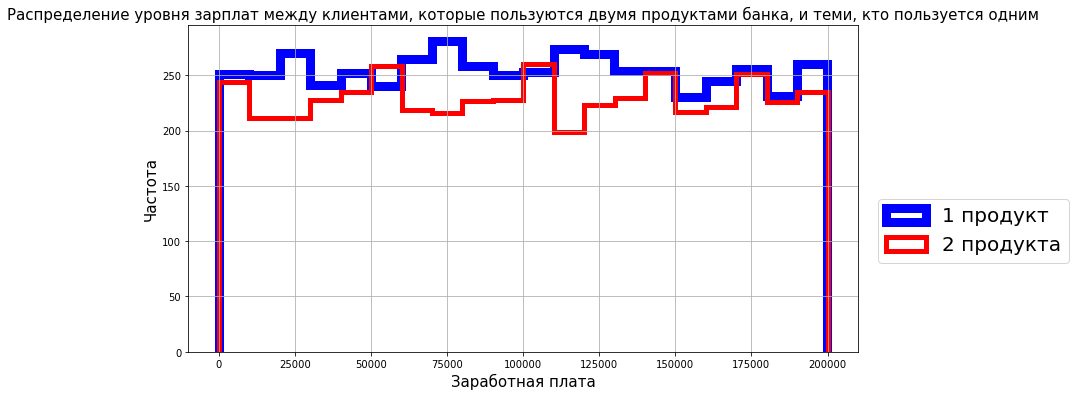

In [39]:
salary_one.hist(bins = 20, color = 'blue', figsize = (12,6), label = '1 продукт', histtype = 'step', lw=9)
salary_two.hist(bins = 20, color = 'red', label = '2 продукта', histtype = 'step', lw=5)
plt.title('Распределение уровня зарплат между клиентами, которые пользуются двумя продуктами банка, \
и теми, кто пользуется одним', size = 15)
plt.legend(prop={'size': 20}, loc = 'best', bbox_to_anchor=(0.83, 0., 0.5, 0.5))
plt.xlabel('Заработная плата', size = 15)
plt.ylabel('Частота', size = 15);

#### 2) Сравним баланс на счёте между клиентами, владеющими кредитной картой, и теми, у кого её нет:

- **Нулевая гипотеза**: Баланс на счёте между клиентами, владеющими кредитной картой, и теми, у кого её нет равен.
- **Альтернативная гипотеза**: Баланс на счёте между клиентами, владеющими кредитной картой, и теми, у кого её нет - различается.

In [40]:
balance_cc_1 = bank_df[bank_df['creditcard'] == 1]['balance']
balance_cc_0 = bank_df[bank_df['creditcard'] == 0]['balance']

In [41]:
t_test(balance_cc_1, balance_cc_0)

p-значение: 0.5890577431451937
Не получилось отвергнуть нулевую гипотезу


In [42]:
bank_df.pivot_table(index = 'creditcard', values = 'balance', aggfunc = ['count', 'mean'])

,count,mean
,balance,balance
creditcard,,
0,2945,119626.450455
1,7055,119911.414262


#### 3) Сравним количество продуктов, которыми пользуются активные и неактивные клиенты:

- **Нулевая гипотеза**: Активные и неактивные клиенты пользуются одинаковым количеcтвом банковских продуктов.
- **Альтернативная гипотеза**: Активные и неактивные клиенты пользуются разным количеcтвом банковских продуктов.

In [43]:
loyalty_prod_1 = bank_df[bank_df['loyalty'] == 1]['products']
loyalty_prod_0 = bank_df[bank_df['loyalty'] == 0]['products']

In [44]:
t_test(loyalty_prod_1, loyalty_prod_0)

p-значение: 0.33650710086488844
Не получилось отвергнуть нулевую гипотезу


In [45]:
bank_df.pivot_table(index = 'loyalty', values = 'products', aggfunc = ['count', 'mean'])

,count,mean
,products,products
loyalty,,
0,4849,1.524438
1,5151,1.535624


#### 4) Сравним количество собственности, которым владеют активные и неактивные клиенты:

- **Нулевая гипотеза**: Активные и неактивные клиенты владеют одинаковым количеcтвом объектов собственности.
- **Альтернативная гипотеза**: Активные и неактивные клиенты владеют разным количеcтвом объектов собственности.

In [46]:
loyalty_obj_1 = bank_df[bank_df['loyalty'] == 1]['objects']
loyalty_obj_0 = bank_df[bank_df['loyalty'] == 0]['objects']

In [47]:
t_test(loyalty_obj_1, loyalty_obj_0)

p-значение: 0.004562186640898455
Отвергаем нулевую гипотезу


In [48]:
bank_df.pivot_table(index = 'loyalty', values = 'objects', aggfunc = ['count', 'mean'])

,count,mean
,objects,objects
loyalty,,
0,4849,5.097340
1,5151,4.933217


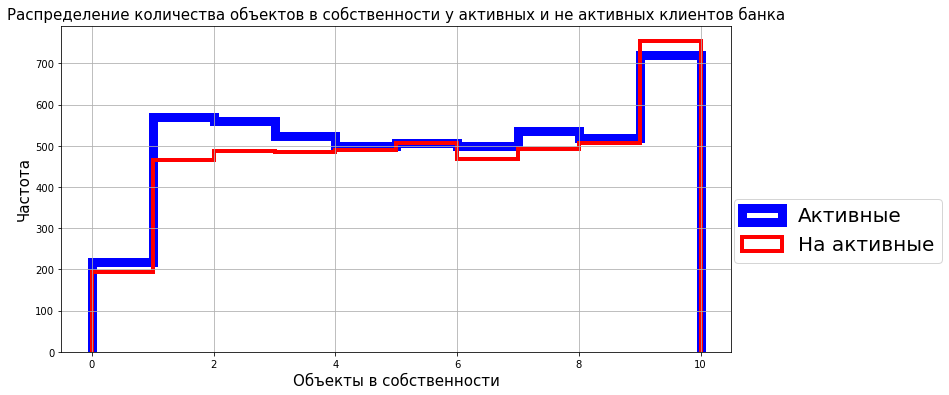

In [49]:
loyalty_obj_1.hist(bins = 10, color = 'blue', figsize = (12,6), label = 'Активные', histtype = 'step', lw=9)
loyalty_obj_0.hist(bins = 10, color = 'red', label = 'На активные', histtype = 'step', lw=4)
plt.title('Распределение количества объектов в собственности у активных и не активных клиентов банка', size = 15)
plt.legend(prop={'size': 20}, loc = 'best', bbox_to_anchor=(0.83, 0., 0.5, 0.5))
plt.xlabel('Объекты в собственности', size = 15)
plt.ylabel('Частота', size = 15);

#### 5) Сравним потребительское поведение мужчин и женщин:

- **Нулевая гипотеза**: Мужчины и женщины в среднем используют одно и то же количество продуктов.
- **Альтернативная гипотеза**: Мужчины и женщины в среднем используют разное количество продуктов.

In [50]:
men_prod = bank_df[bank_df['gender'] == 'М']['products']
women_prod = bank_df[bank_df['gender'] == 'Ж']['products']

In [51]:
t_test(men_prod, women_prod)

p-значение: 0.028826972896061707
Отвергаем нулевую гипотезу


In [52]:
bank_df.pivot_table(index = 'gender', values = 'products', aggfunc = ['count', 'mean'])

,count,mean
,products,products
gender,,
Ж,4543,1.544134
М,5457,1.518600


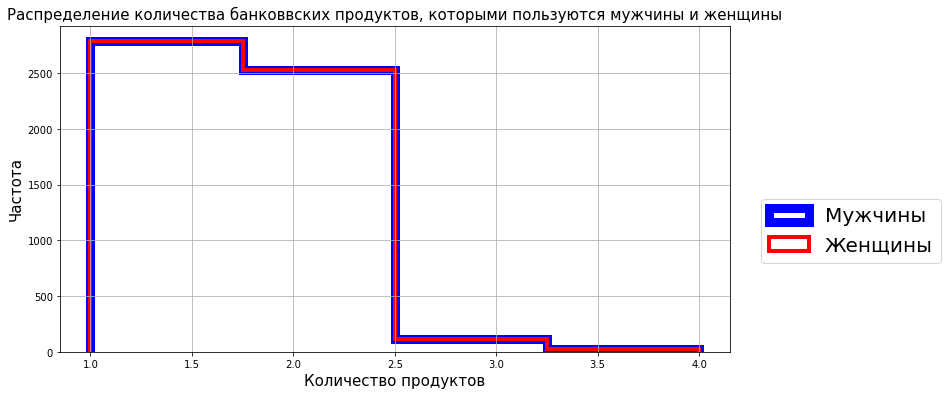

In [53]:
men_prod.hist(bins = 4, color = 'blue', figsize = (12,6), label = 'Мужчины', histtype = 'step', lw=9)
men_prod.hist(bins = 4, color = 'red', label = 'Женщины', histtype = 'step', lw=4)
plt.title('Распределение количества банковвских продуктов, которыми пользуются мужчины и женщины', size = 15)
plt.legend(prop={'size': 20}, loc = 'best', bbox_to_anchor=(0.83, 0., 0.5, 0.5))
plt.xlabel('Количество продуктов', size = 15)
plt.ylabel('Частота', size = 15);

---
Мы провели проверку гипотез, которые сформулировали перед началом иссследования. Представим результы тестирования в виде таблицы:

|N|Гипотеза|  р-value | Результаты проверки|
|:---:|:--------|   :--------:     | :--------:|       
|1|Доход между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается |   0.286  | Не подтверждена |
|2|Баланс на счёте между клиентами, владеющими кредитной картой, и теми, у кого её нет, различается| 0.589|Не подтверждена |
|3|Активные и не активные клиенты пользуются разным количеcтвом продуктов|0.336|Не подтверждена |
|4|Активные и неактивные клиенты владеют разным количеством собственности | 0.004 | Подтверждена |
|5|Мужчины и женщины в среднем используют разное количество продуктов | 0.028| Подтверждена|

Особенно противоречиво выглядит результат проверки последней гипотезы. Получилось, что различие в количестве банковских продуктов, которым пользуются мужчины и женщины статистически значимо. При этом ни средние, ни график этого не показывает. 

---
***Проведем дополнительные тесты и проверим ещё несколько гипотез:***

In [54]:
columns_test = {'score':"баллы кредитного скоринга", 
                'age':"возраст", 
                'objects':"количество объектов в собственности", 
                'balance':"баланс на счёте", 
                'products':"количество используемых банковских продуктов", 
                'estimated_salary':'заработная плата'}

----------------------------------------------------------------------------------------------------
Сформулируем гипотезы: 
H0: Средние показатели параметра баллы кредитного скоринга равны для ушедших и оставшихся клиентов
H1: Средние показатели различны

p-значение: 0.006738213892192373
Отвергаем нулевую гипотезу



,count,mean
,score,score
churn,,
0,7963,651.853196
1,2037,645.351497


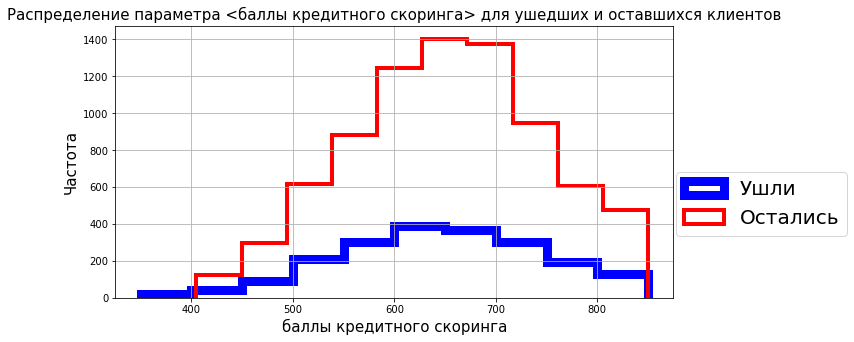

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Сформулируем гипотезы: 
H0: Средние показатели параметра возраст равны для ушедших и оставшихся клиентов
H1: Средние показатели различны

p-значение: 1.2399313093427738e-186
Отвергаем нулевую гипотезу



,count,mean
,age,age
churn,,
0,7963,37.408389
1,2037,44.837997


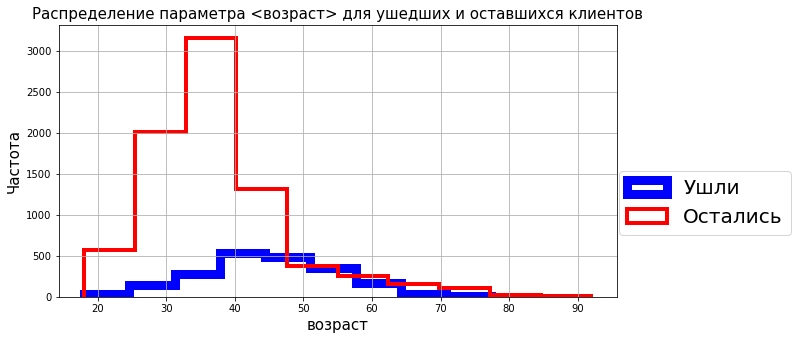

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Сформулируем гипотезы: 
H0: Средние показатели параметра количество объектов в собственности равны для ушедших и оставшихся клиентов
H1: Средние показатели различны

p-значение: 0.16152684949473256
Не получилось отвергнуть нулевую гипотезу



,count,mean
,objects,objects
churn,,
0,7963,5.033279
1,2037,4.932744


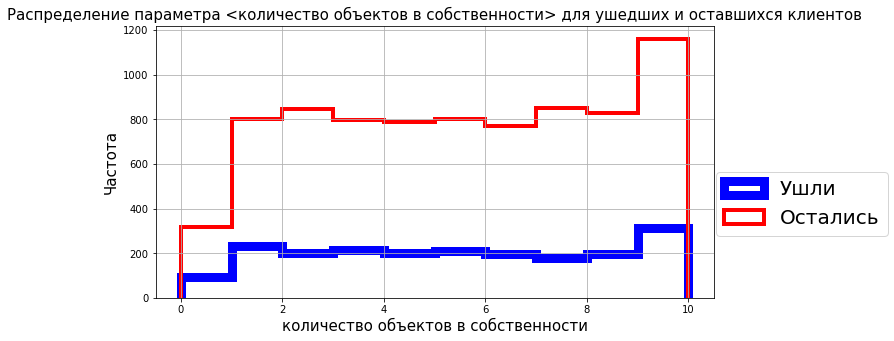

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Сформулируем гипотезы: 
H0: Средние показатели параметра баланс на счёте равны для ушедших и оставшихся клиентов
H1: Средние показатели различны

p-значение: 0.14445298080787655
Не получилось отвергнуть нулевую гипотезу



,count,mean
,balance,balance
churn,,
0,7963,119650.016901
1,2037,120521.276205


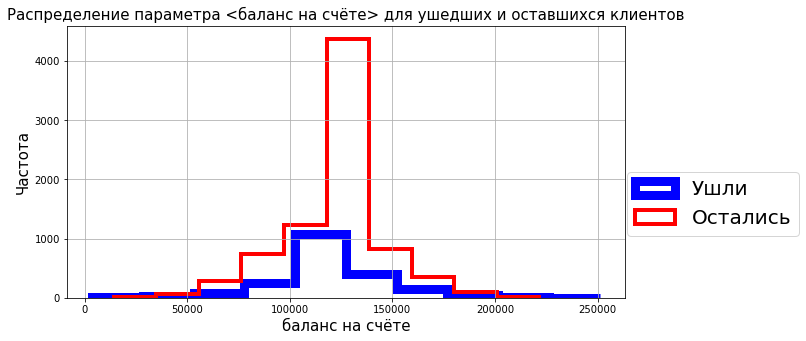

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Сформулируем гипотезы: 
H0: Средние показатели параметра количество используемых банковских продуктов равны для ушедших и оставшихся клиентов
H1: Средние показатели различны

p-значение: 1.717333004804293e-06
Отвергаем нулевую гипотезу



,count,mean
,products,products
churn,,
0,7963,1.544267
1,2037,1.475209


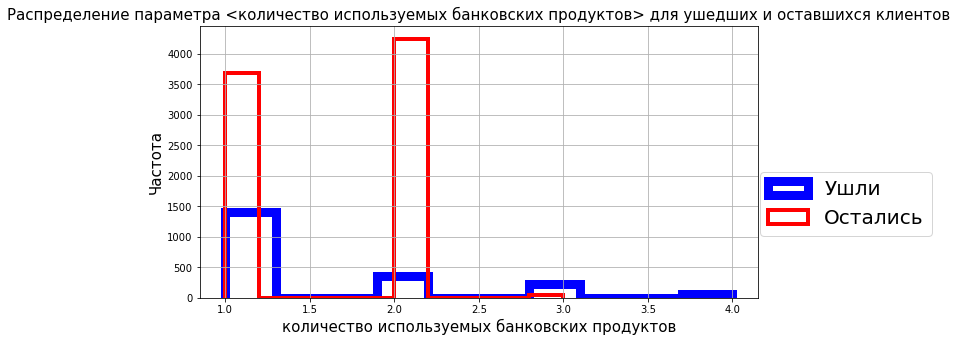

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Сформулируем гипотезы: 
H0: Средние показатели параметра заработная плата равны для ушедших и оставшихся клиентов
H1: Средние показатели различны

p-значение: 0.22644042802223346
Не получилось отвергнуть нулевую гипотезу



,count,mean
,estimated_salary,estimated_salary
churn,,
0,7963,99738.391772
1,2037,101465.677531


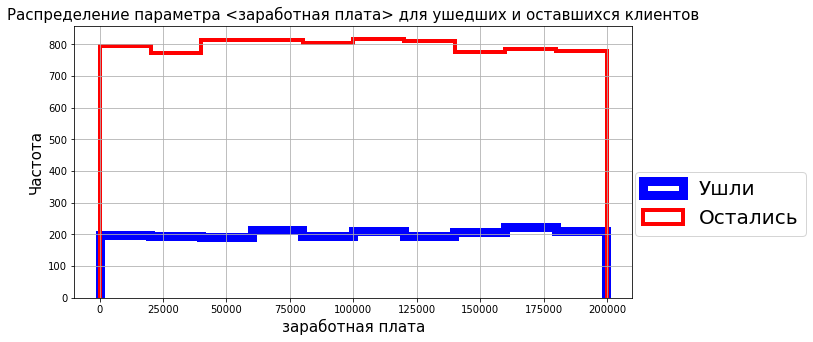

----------------------------------------------------------------------------------------------------


In [55]:
for i in columns_test:
    print(100*'-')
    print('Сформулируем гипотезы: ')
    print('H0: Средние показатели параметра',
          colored(columns_test[i], on_color='on_yellow', attrs=['bold']),'равны для ушедших и оставшихся клиентов')
    print('H1: Средние показатели различны')
    print()
    
    sample_left = bank_df[bank_df['churn'] == 1][i]
    sample_stayed = bank_df[bank_df['churn'] == 0][i]
    
    t_test(sample_left, sample_stayed)
    print()
    display(bank_df.pivot_table(index = 'churn', values = i, aggfunc = ['count', 'mean']))
    print()
    sample_left.hist(bins = 10, color = 'blue', figsize = (10,5), label = 'Ушли', histtype = 'step', lw=9)
    sample_stayed.hist(bins = 10, color = 'red', label = 'Остались', histtype = 'step', lw=4)
    plt.title('Распределение параметра <' + columns_test[i] + '> для ушедших и оставшихся клиентов', size = 15)
    plt.legend(prop={'size': 20}, loc = 'best', bbox_to_anchor=(0.83, 0., 0.5, 0.5))
    plt.xlabel(columns_test[i], size = 15)
    plt.ylabel('Частота', size = 15)
    plt.show();
    print(100*'-')

Мы проверили ряд гипотез на статистически значимые различия между параметрами для клиентов, которые ушли из банка, и клиентов, которые продолжают пользоваться услугами. В результате были установлены статистические различия между клиентами по баллам кредитного скоринга, возрасту и количеству используемых банковских продуктов.  

|N|Гипотеза|  р-value | Результаты проверки|
|:---:|:--------|:--------:|:--------:|       
|1|Количество баллов кредитного скоринга для оставщихся клиентов отличается от баллов у ушедших клиентов банка|0.006 | Подтверждена|
|2|Возраст оставщихся клиентов отличается от возраста ушедших клиентов банка| 0.000|Подтверждена |
|3|Количество объектов в собственности у оставщихся клиентов отличается от объекта у ушедших клиентов банка|0.161|Не подтверждена|
|4|Баланс на счете у оставщихся клиентов отличается от баланса на счете у ушедших клиентов банка|0.144|Не подтверждена|
|5|Количество используемых банковских продуктов у оставщихся клиентов отличается от количества продуктов у ушедших клиентов банка| 0.000| Подтверждена|
|6|Зарплата оставщихся клиентов отличается от зарплаты ушедших клиентов банка|0.226|Не подтверждена|

<a id = "step5"></a>
## 5. Общий вывод по проекту

- [Начало](#head)
- [Пункт 1](#step1) 
- [Пункт 2](#step2)
- [Пункт 3](#step3)
- [Пункт 4](#step4)

В ходе работы был проведен анализ клиентов банка "Метанпром" на выборке из 10000 клиентов. Банк региональный, располагается в Ярославле и областных городах: Ростове Великом и Рыбинске. Предварительно данные прошли предобработку
Было необходимо проанализировать клиентов регионального банка, сегментировать пользователей по количеству потребляемых продуктов и выявить какие признаки сильнее всего влияют на отток.

Среднему клиенту нашего банка из данного датасета 37 лет, зарабатывает он в районе 100000 руб. Приблизительно такая же сумма лежит на его счёте. У него 650 баллов кредитного скоринга. Учитывая, что мы не знаем по какой системе считаются эти баллы, сказать хороший это показатель или нет - мы не можем. В половине случаев наш клиент - это мужчина из Ярославля. У него 1 или 2 банковских продукта, один из которых преимущественно - кредитная карта. На текущий момент отток составил 20.4 %. Самый большой отток клиентов произошел в Ростове Великом. Там ушли 32.4% клиентов.
В рамках исследовательского анализа данных мы узнали, что наибольшее влияние на показатель оттока оказывает возраст и активность клиента. С увеличением возраста растет вероятность, что клиент перестанет пользоваться услугами банка. Тоже самое может произойти в связи со снижением активности клиента.

Мы провели сегментацию пользователей на основе данных о количестве потребляемых продуктов и по её итогам решили сегментирвоать клиентов на 2 категории: те, кто пользуются одним продуктом и те, кто пользуется двумя и более банковскими продуктами.

Выяснилось, что отток среди клиентов, которые пользуются только одним продуктом выше более чем в два раза, по сравнению с теми клиентами, которые пользуются двумя и более продуктами банка.
Анализ средних показателей внутри данных групп показал, что они больше не имеют значительных отличий. Можно отметить, что средний возраст тех, кто использует один продукт, немного выше по сравнению с другой группой. Если клиент является пользователем одной услуги, то в 70% случаях - это кредитная карта.

Была проведена проверка гипотез с помощью t-теста с уровнем значимости 5%, которые были сформулированы перед началом исследования. Результаты представлены в таблице:

|N|Гипотеза|  р-value |Результаты проверки|
|:---:|:--------|:--------:|:--------:|       
|1|Доход между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается |   0.286  | Не подтверждена |
|2|Баланс на счёте между клиентами, владеющими кредитной картой, и теми, у кого её нет, различается| 0.589|Не подтверждена |
|3|Активные и не активные клиенты пользуются разным количеcтвом продуктов|0.336|Не подтверждена |
|4|Активные и неактивные клиенты владеют разным количеством собственности | 0.004 | Подтверждена |
|5|Мужчины и женщины в среднем используют разное количество продуктов | 0.028| Подтверждена|

Мы проверили ряд дополнительных гипотез на статистически значимые различия между параметрами для клиентов, которые ушли из банка, и клиентов, которые продолжают пользоваться услугами. В результате были установлены статистические различия между клиентами по баллам кредитного скоринга, возрасту и количеству используемых банковских продуктов.  

|N|Гипотеза|  р-value |Результаты проверки|
|:---:|:--------|:--------:|:--------:|       
|1|Количество баллов кредитного скоринга для оставщихся клиентов отличается от баллов у ушедших клиентов банка|0.006 | Подтверждена|
|2|Возраст оставщихся клиентов отличается от возраста ушедших клиентов банка| 0.000|Подтверждена |
|3|Количество объектов в собственности у оставщихся клиентов отличается от объекта у ушедших клиентов банка|0.161|Не подтверждена|
|4|Баланс на счете у оставщихся клиентов отличается от баланса на счете у ушедших клиентов банка|0.144|Не подтверждена|
|5|Количество используемых банковских продуктов у оставщихся клиентов отличается от количества продуктов у ушедших клиентов банка| 0.000| Подтверждена|
|6|Зарплата оставщихся клиентов отличается от зарплаты ушедших клиентов банка|0.226|Не подтверждена|

**Рекомендации по взаимодействию с клиентами банка:**
   
1. Стоит изучить причины оттока клиентов, провести дополнительное исследование. Уделить особенное внимание Ростову, т.к. там потеряли треть клиентов. 
2. При продвижении продуктов сделать акцент на возраст. Необходимо предлагать продукты, с учетом интересов людей разных возрастов.
3. Побуждать клиентов активно пользоваться банковскими продуктами с помощью маркетинговых кампаний и акций.
4. Как показало исследование, кредитная карта есть у большинства. Стоит добиваться вовлеченности клиентов в использование других банковских продуктов, так как с ростом числа услуг на одного клиента снижается отток.  